# Project1 - Team 5, Studio 1

Annie Chu, SeungU Lyu

### Question: How would the age demographics change over the course of 15 years if the US implemented an one-child policy?
Currently, the US population is 325.7 million, projected to be around 360 million by 2030. Data provided by the US Census also shows the greatest change in population among the 65+ age group, followed by the 18-44 age group, followed by the 45-64 group, and finally the under 18 group. This change may be explained by the evident in the declining fertility, which has dropped to an all time low of 1.76 children/female. 

We aimed to explore how the age group demographics would shift over 15 years if the US had implemented a one-child policy, essentially viewing how the US population would change if the fertility dropped to less than 1 child/female. 

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

# importing "copy" for copy operations 
import copy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd

##### Initial Data Pulls

Initial Population Data by Age Range and Gender (0-4, 5-9, etc)

In [3]:
pop_init_data = pd.read_csv('data/pop_2017_US.csv', index_col='age')

,male,female
age,,
4,10195968,9742892
9,10368141,9936097
14,10605072,10173382
19,10800491,10331169
24,11349142,10769493
29,11902230,11468230
34,11089131,10883081
39,10615985,10616012
44,9753115,9890258


Source: https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?src=bkmk

Death Rate Data by Age Group and Gender (0, 1-4, 5-9, etc)

In [4]:
death_rate_data = pd.read_csv('data/age_death_rate.csv', index_col='age')

,male,female
age,,
0,0.006392,0.005377
4,0.000280,0.000216
9,0.000132,0.000102
14,0.000169,0.000122
19,0.000666,0.000291
24,0.001299,0.000465
29,0.001505,0.000608
34,0.001709,0.000835
39,0.001985,0.001101


Source: https://www.statista.com/statistics/241488/population-of-the-us-by-sex-and-age/

Probability of Woman Having a Child by Age Group (15-19, 20-24, etc)

In [5]:
child_ever_data = pd.read_csv('data/child_ever_born.csv', index_col='age')

,percentage
age,
19,0.051
24,0.286
29,0.506
34,0.718
39,0.828
44,0.849
49,0.832


Source: Fertility of Women in the United States: 2012, Lindsay M. Monte and Renee R. Ellis

Probability of Woman Having First Child by Age

In [6]:
first_birth_data = pd.read_csv('data/first_birth_rate.csv', index_col='age')

,percentage
age,
15,0.0090
16,0.0182
17,0.0314
18,0.0470
19,0.0597
20,0.0661
21,0.0664
22,0.0650
23,0.0655


Source: https://www.cdc.gov/nchs/nvss/births.htm

### Beginning Code

Adapting Initial Population Data into Age Groups

In [7]:
male_pop = linspace(0,0,90)
female_pop = linspace(0,0,90)

ident = 4
for i in range(90):
    if i>ident:
        ident += 5
    male_pop[i] = int(pop_init_data.male[ident]/5)
    female_pop[i] = int(pop_init_data.female[ident]/5)

In [8]:
female_pop[0] #test

1948578.0

Setting Initial Population State by Gender

In [9]:
init_population = State(male = male_pop, female = female_pop)

,values
male,"[2039193.0, 2039193.0, 2039193.0, 2039193.0, 2..."
female,"[1948578.0, 1948578.0, 1948578.0, 1948578.0, 1..."


Storing Model Parameters in a System Object

In [10]:
system = System(male_death = death_rate_data.male,
               female_death = death_rate_data.female,
               child_ever = child_ever_data.percentage,
               first_rate = first_birth_data.percentage,
               t_0 = 2018,
               t_end = 2033,
               init_pop = init_population)

,values
male_death,age 0 0.006392 4 0.000280 9 0.0001...
female_death,age 0 0.005377 4 0.000216 9 0.0001...
child_ever,age 19 0.051 24 0.286 29 0.506 34 ...
first_rate,age 15 0.0090 16 0.0182 17 0.0314 18 ...
t_0,2018
t_end,2033
init_pop,"male [2039193.0, 2039193.0, 2039193.0, 20..."


Creating State object to initialize arrays for the 3 different groups: Males, Females who haven't had the chance to have a child, Females who have had the chance to have a child

In [11]:
population = State(male = copy.deepcopy(system.init_pop.male), female = copy.deepcopy(system.init_pop.female), female_w = linspace(0,0,90))

,values
male,"[2039193.0, 2039193.0, 2039193.0, 2039193.0, 2..."
female,"[1948578.0, 1948578.0, 1948578.0, 1948578.0, 1..."
female_w,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


Assigning Population Value to 2 Female Groups Above

In [12]:
ident = 19
for i in range(15,49):
    if i>ident:
        ident += 5
    population.female_w[i] = int(population.female[i]*system.child_ever[ident])
    population.female[i] = int(population.female[i]*(1-system.child_ever[ident]))

Implementation of Relative Gender Death Rate to 3 Groups

In [13]:
def update_func_death(state,system):
    ident = 4
    state.male[0] = int(state.male[0] * (1-system.male_death[0]))
    state.female[0] = int(state.female[0] * (1-system.female_death[0]))
    for i in range(1,90):
        if i>ident:
            ident += 5
        state.male[i] = int(state.male[i] * (1-system.male_death[ident]))
        state.female[i] = int(state.female[i] * (1-system.female_death[ident]))
        state.female_w[i] = int(state.female_w[i] * (1-system.female_death[ident]))
    return state

Implementation of Birth Rate: Creating Newborns + Shifting Female Group (those who still have potential to give birth) to Female_W Group (those who no longer do)

In [14]:
def update_func_birth(state,system):
    baby_total = 0
    for i in range(15,50):
        baby = int(state.female[i]*system.first_rate[i])
        state.female[i] -= baby
        state.female_w[i] += baby
        baby_total += baby
    return baby_total

Updating Population Age + New Births: Initializing New Births to Female/Male to 0 Age Group and Shifting All Ages Up by one

In [15]:
def update_func_pop(baby,state,system):
    for i in range(89):
        k = 89-i
        state.male[k] = state.male[k-1]
        state.female[k] = state.female[k-1]
        state.female_w[k] = state.female_w[k-1]
    state.male[0] = int(baby/2)
    state.female[0] = int(baby/2)
    return state

General adding function to find total population among 3 groups (male, female, female_w)

In [16]:
def addall(state):
    total = 0
    for i in range(90):
        total = total + state.male[i] + state.female[i] + state.female_w[i]
    return total

Function used to create TimeSeries with Total Population 

In [17]:
def run_population(system, state, update_func_death, update_func_birth, update_func_pop, addall):
    nstate = State(male = copy.deepcopy(state.male), female = copy.deepcopy(state.female), female_w = copy.deepcopy(state.female_w))
    results = TimeSeries()
    for t in linrange(system.t_0, system.t_end):
        nstate = update_func_death(nstate,system)
        baby = update_func_birth(nstate,system)
        nstate = update_func_pop(baby,nstate,system)
        totalpop = addall(nstate)
        results[t+1] = totalpop
    return results

Adding function used to define what the age groups are and their subsequent total population within that age group
Shown later, we split the population into 5 age groups: 0-14, 15-30, 31-49, 50-70, 71-89. The end age is 89 because the initial data pull age limit is 89. 

In [18]:
def agedemos(num_s, num_e, state):
    age_total = 0
    for i in range(num_s, num_e+1):
        age_total = age_total + state.male[i] + state.female[i] + state.female_w[i]
    return age_total

Function used to create TimeSeries with Total Age Group Values

In [19]:
def age_group(system, state, update_func_death, update_func_birth, update_func_pop, agedemos):
    nstate = State(male = copy.deepcopy(state.male), female = copy.deepcopy(state.female), female_w = copy.deepcopy(state.female_w))
    demo_state = State(ag_one = TimeSeries(), ag_two = TimeSeries(), ag_three = TimeSeries(), ag_four = TimeSeries(), ag_five = TimeSeries())
    for t in linrange(system.t_0, system.t_end):
        nstate = update_func_death(nstate,system)
        baby = update_func_birth(nstate,system)
        nstate = update_func_pop(baby,nstate,system)
        demo_state.ag_one[t+1] = agedemos(0,14,nstate)
        demo_state.ag_two[t+1] = agedemos(15,30,nstate)
        demo_state.ag_three[t+1] = agedemos(31,49,nstate)
        demo_state.ag_four[t+1] = agedemos(50,70,nstate)
        demo_state.ag_five[t+1] = agedemos(71,89,nstate)
    return demo_state

Function used to create TimeSeries with Total Age Group Percentages (demographics)

In [20]:
def age_group_per(system, state, update_func_death, update_func_birth, update_func_pop, agedemos, addall):
    nstate = State(male = copy.deepcopy(state.male), female = copy.deepcopy(state.female), female_w = copy.deepcopy(state.female_w))
    demo_state = State(ag_one = TimeSeries(), ag_two = TimeSeries(), ag_three = TimeSeries(), ag_four = TimeSeries(), ag_five = TimeSeries())
    for t in linrange(system.t_0, system.t_end):
        nstate = update_func_death(nstate,system)
        baby = update_func_birth(nstate,system)
        nstate = update_func_pop(baby,nstate,system)
        totalpop = addall(nstate)
        demo_state.ag_one[t+1] = agedemos(0,14,nstate)*100/totalpop
        demo_state.ag_two[t+1] = agedemos(15,30,nstate)*100/totalpop
        demo_state.ag_three[t+1] = agedemos(31,50,nstate)*100/totalpop
        demo_state.ag_four[t+1] = agedemos(51,70,nstate)*100/totalpop
        demo_state.ag_five[t+1] = agedemos(71,89,nstate)*100/totalpop
    return demo_state

Viewing Total Age Group Demographic (Values) by Year

In [21]:
demo = age_group(system, population, update_func_death, update_func_birth, update_func_pop, agedemos)

,values
ag_one,2019 58637396.0 2020 56262942.0 2021 ...
ag_two,2019 70720957.0 2020 70151983.0 2021 ...
ag_three,2019 79473524.0 2020 79807552.0 2021 ...
ag_four,2019 83694002.0 2020 83818946.0 2021 ...
ag_five,2019 31059531.0 2020 31644211.0 2021 ...


Viewing Total Age Group Demographic (Percentages) by Year

In [22]:
demo_per = age_group_per(system, population, update_func_death, update_func_birth, update_func_pop, agedemos, addall)

,values
ag_one,2019 18.121150 2020 17.490039 2021 16...
ag_two,2019 21.855422 2020 21.807621 2021 21...
ag_three,2019 25.852632 2020 26.105134 2021 26...
ag_four,2019 24.572239 2020 24.760208 2021 24...
ag_five,2019 9.598557 2020 9.836999 2021 10...


Viewing Total Population by Year

In [23]:
results = run_population(system, population, update_func_death, update_func_birth, update_func_pop, addall)

,values
2019,323585410.0
2020,321685634.0
2021,319959654.0
2022,318366671.0
2023,316874166.0
2024,315459106.0
2025,313994933.0
2026,312487013.0
2027,310938794.0
2028,309353184.0


Creating a TimeSeries Adding All Age Group Values to Check Consistency with Total Population

In [24]:
check = TimeSeries()
for i in linrange(system.t_0, system.t_end):
    check = demo.ag_one + demo.ag_two + demo.ag_three + demo.ag_four + demo.ag_five
check

2019    323585410.0
2020    321685634.0
2021    319959654.0
2022    318366671.0
2023    316874166.0
2024    315459106.0
2025    313994933.0
2026    312487013.0
2027    310938794.0
2028    309353184.0
2029    307539441.0
2030    305657560.0
2031    303717676.0
2032    301727870.0
2033    299695062.0
dtype: float64

### Data Visualization

##### Plotting Total Population by Year -- Line Graph

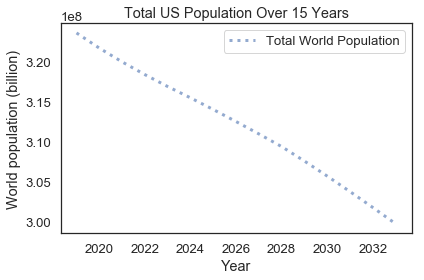

In [25]:
plot(results, ':', label='Total World Population')

decorate(xlabel='Year', 
         ylabel='World population (billion)',
         title='Total US Population Over 15 Years')

##### Plotting Age Group Demographics (Value) by Year -- Line Graph

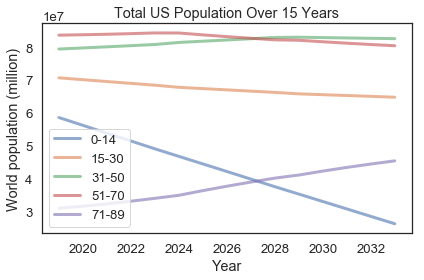

In [26]:
plot(demo.ag_one, label = '0-14')
plot(demo.ag_two, label = '15-30')
plot(demo.ag_three, label = '31-50')
plot(demo.ag_four, label = '51-70')
plot(demo.ag_five, label = '71-89')

decorate(xlabel='Year', 
         ylabel='World population (million)',
         title='Total US Population Over 15 Years')

##### Plotting Age Group Demographics (Value) by Year -- Stacked Bar Graph

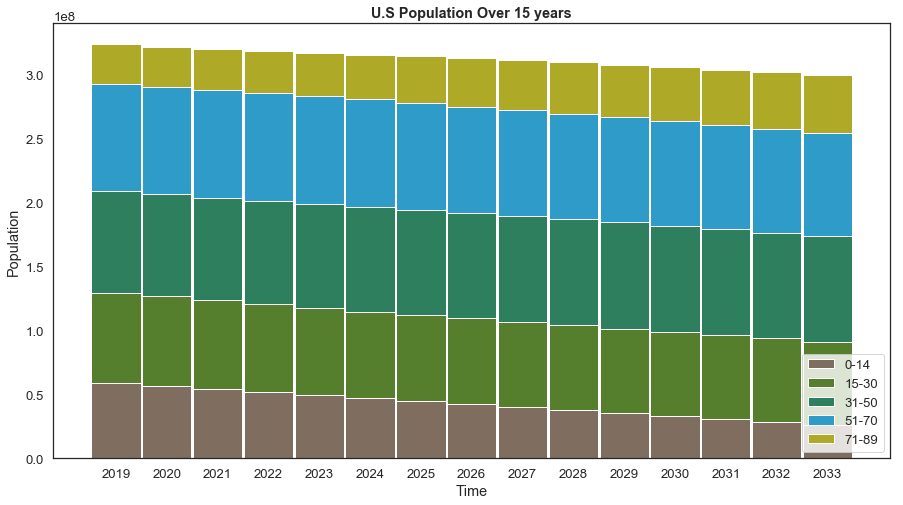

In [27]:
# Values of each group
bars1 = demo.ag_one
bars2 = demo.ag_two
bars3 = demo.ag_three
bars4 = demo.ag_four
bars5 = demo.ag_five

# The position of the bars on the x-axis-timerange
r = linrange(system.t_0+1, system.t_end+1)

#setting bar width
barWidth = 0.97

plt.figure(figsize=(15, 8))
 
# Create brown bars
plt.bar(r, bars1, color='#7f6d5f', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color='#557f2d', edgecolor='white', width=barWidth)
# Create green bars (top)
plt.bar(r, bars3, bottom=bars1+bars2, color='#2d7f5e', edgecolor='white', width=barWidth)
# Create Blue bars
plt.bar(r, bars4, bottom=bars1+bars2+bars3, color='#2E9BC8', edgecolor='white', width=barWidth)
#Create yellow bars
plt.bar(r, bars5, bottom=bars1+bars2+bars3+bars4, color='#AFA928', edgecolor='white', width=barWidth)
 
# Custom axis
plt.xticks(r)
plt.xlabel("Time")
plt.ylabel("Population")
plt.title('U.S Population Over 15 years', fontweight = 'bold')
group = ['0-14','15-30','31-50','51-70','71-89']
plt.legend(group,loc=4)
 
# Show graphic
plt.show()


##### Plotting Age Group Demographics (Percent) by Year -- Line Graph

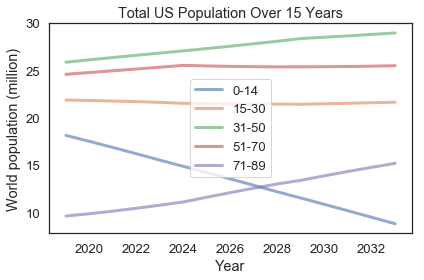

In [28]:
plot(demo_per.ag_one, label = '0-14')
plot(demo_per.ag_two, label = '15-30')
plot(demo_per.ag_three, label = '31-50')
plot(demo_per.ag_four, label = '51-70')
plot(demo_per.ag_five, label = '71-89')

decorate(xlabel='Year', 
         ylabel='World population (million)',
         title='Total US Population Over 15 Years')

##### Plotting Age Group Demographics (Value) by Year -- Stacked Bar Graph

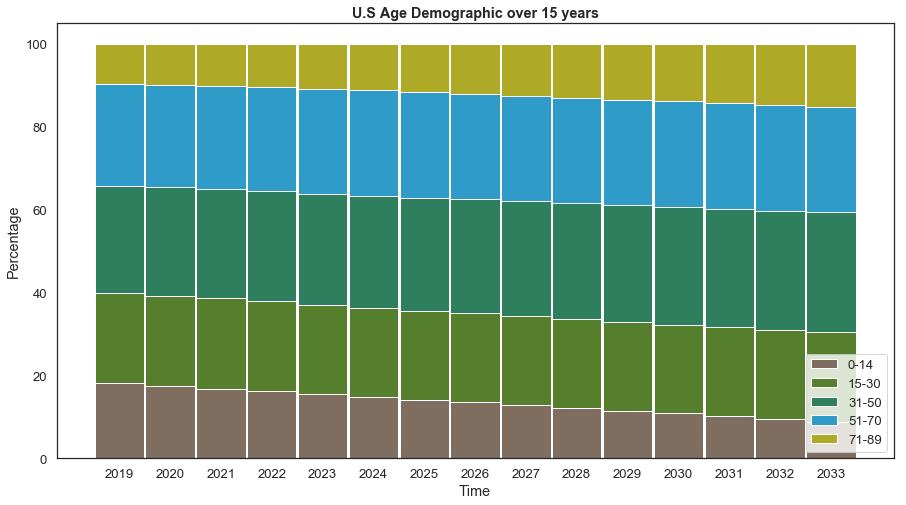

In [29]:
# Values of each group
bars1 = demo_per.ag_one
bars2 = demo_per.ag_two
bars3 = demo_per.ag_three
bars4 = demo_per.ag_four
bars5 = demo_per.ag_five

# The position of the bars on the x-axis-timerange
r = linrange(system.t_0+1, system.t_end+1)

#setting bar width
barWidth = 0.97

plt.figure(figsize=(15, 8))
 
# Create brown bars
plt.bar(r, bars1, color='#7f6d5f', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color='#557f2d', edgecolor='white', width=barWidth)
# Create green bars (top)
plt.bar(r, bars3, bottom=bars1+bars2, color='#2d7f5e', edgecolor='white', width=barWidth)
# Create Blue bars
plt.bar(r, bars4, bottom=bars1+bars2+bars3, color='#2E9BC8', edgecolor='white', width=barWidth)
#Create yellow bars
plt.bar(r, bars5, bottom=bars1+bars2+bars3+bars4, color='#AFA928', edgecolor='white', width=barWidth)
 
# Custom axis
plt.xticks(r)
plt.xlabel("Time")
plt.ylabel("Percentage")
plt.title('U.S Age Demographic over 15 years', fontweight = 'bold')

group = ['0-14','15-30','31-50','51-70','71-89']
plt.legend(group,loc=4)
 
# Show graphic
plt.show()

### Results and Analyzation

The graphs above show the change in age demographics within the US over the course of 15 years if a one-child policy was implemented. 

Based on this model, total population seems to be dropping at a fairly linear rate. Within the total population, age group 0-14 drastically drops, age group 15-30 stays relatively constant, age group 31-50 increases moderately until 2028, in which it begins to increase slightly, age group 51-70 increases until 2024, then levels out, and age group 71-89 increases slightly until 2024, in which it begins to increase moderately. 

This model predicts that by 2033, the largest age group demographic by percent will be 31-50, followed by 51-70, 15-30, 71-89, and finally 0-14. The only difference the order of age group when comparing the current 2018 age demographic split is a switch between the 71-89 age group and the 0-14 age group. 

This model also predicts that by 2033, the difference between the 3 largest age groups by percent (31-50, 51-70, 15-30) will increase. 

This model's limitations include not accounting for twin births, assuming the birth rate and death rate for each age group and gender would remain constant for the next 15 years, assuming the gender birth percentage is 50/50, and assuming there are no immigrants. Additionally, the data used in this model is not from the current 2018 year. 

We conclude that this model is reasonable due to the fact that the assumptions made and factors not included would not have impacted the population more than the implemented one-child policy.